In [ ]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]


ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]


RestingBP: resting blood pressure [mm Hg]


Cholesterol: serum cholesterol [mm/dl]


FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]


RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]


MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]


ExerciseAngina: exercise-induced angina [Y: Yes, N: No]


Oldpeak: oldpeak = ST [Numeric value measured in depression]


ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]


HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From data we have corpus of people age between 28 to 77.


In [ ]:
result = data.groupby(['HeartDisease', 'ChestPainType']).size().reset_index(name='Count')

# Displaying the result
print(result)

   HeartDisease ChestPainType  Count
0             0           ASY    104
1             0           ATA    149
2             0           NAP    131
3             0            TA     26
4             1           ASY    392
5             1           ATA     24
6             1           NAP     72
7             1            TA     20


<Axes: xlabel='ChestPainType', ylabel='HeartDisease'>

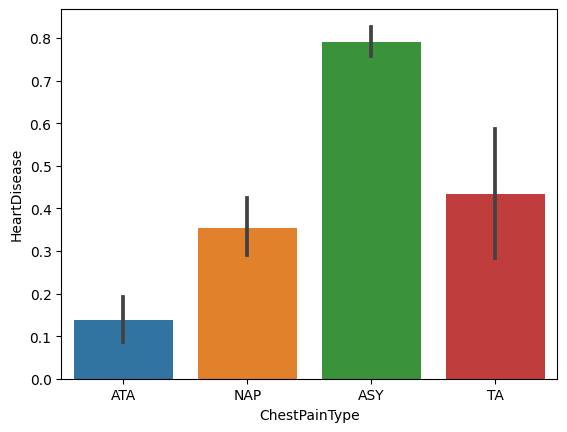

In [ ]:
sn.barplot(x="ChestPainType",y="HeartDisease",data=data)

<Axes: xlabel='ChestPainType', ylabel='Count'>

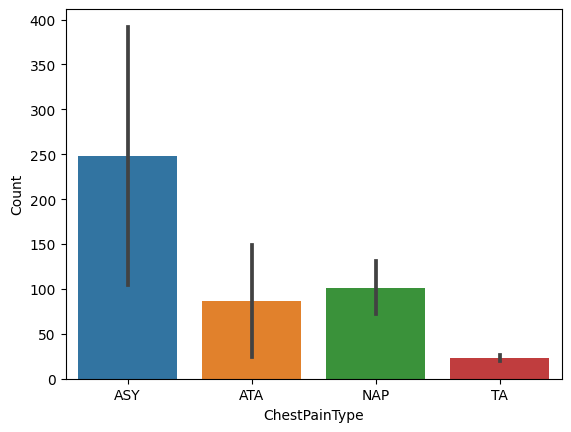

In [ ]:
sn.barplot(x="ChestPainType",y="Count",data=result)

As we could se Asymptomatic chest pain occur most time

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

We cant process data in form of string or any other data type so we need to change data type ,
there are different ways to do this but i have used label encoder

In [ ]:
for column in data:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])


In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


Through pandas i have used correlation map to find out correlation between different features

In [ ]:
data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


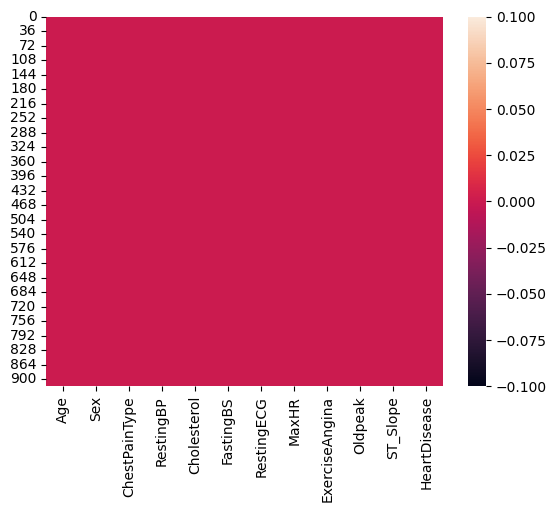

In [ ]:
hm=sn.heatmap(data.isnull())

NO NULL VALUES IN DATASET AS HEATMAP ALSO proves

**Test Train Split Now**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = data['HeartDisease']
x = data.drop('HeartDisease', axis=1)


In [ ]:
import tensorflow as tf
from  tensorflow import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

In [ ]:
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Additional Dense layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/70
22/22 [==============================] - 6s 39ms/step - loss: 1.5818 - accuracy: 0.6265 - val_loss: 0.7002 - val_accuracy: 0.6957
Epoch 2/70
22/22 [==============================] - 0s 14ms/step - loss: 0.7548 - accuracy: 0.6686 - val_loss: 0.6060 - val_accuracy: 0.7174
Epoch 3/70
22/22 [==============================] - 0s 16ms/step - loss: 0.6208 - accuracy: 0.6802 - val_loss: 0.6243 - val_accuracy: 0.6870
Epoch 4/70
22/22 [==============================] - 0s 16ms/step - loss: 0.6407 - accuracy: 0.6846 - val_loss: 0.6097 - val_accuracy: 0.7348
Epoch 5/70
22/22 [==============================] - 0s 13ms/step - loss: 0.6040 - accuracy: 0.6890 - val_loss: 0.6379 - val_accuracy: 0.7174
Epoch 6/70
22/22 [==============================] - 0s 13ms/step - loss: 0.5707 - accuracy: 0.7224 - val_loss: 0.6058 - val_accuracy: 0.7391
Epoch 7/70
22/22 [==============================] - 0s 14ms/step - loss: 0.5745 - accuracy: 0.7311 - val_loss: 0.8839 - val_accuracy: 0.5913
Epoch 8/70
22

In [ ]:
y=model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [ ]:

from sklearn.metrics import confusion_matrix

y=np.round(y)

In [ ]:
y

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],

# **Confusion matrix**

In [ ]:
cm = confusion_matrix(y_test,y)

In [ ]:
cm

array([[ 69,  23],
       [ 19, 119]])

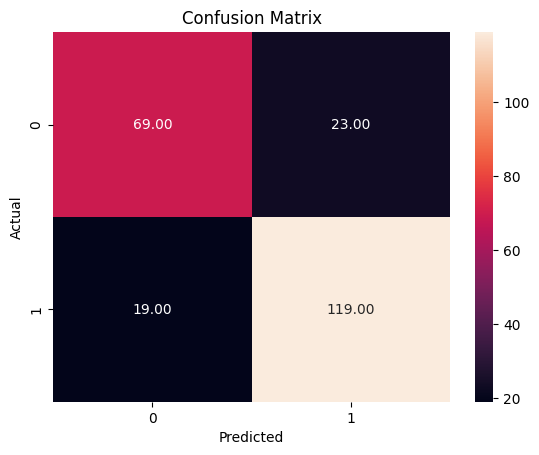

In [ ]:
# prompt: visualise data

sn.heatmap(cm,annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
